In [26]:
import numpy as np
import random
import tools

We'll store our deck of cards as a 1-dimensional array of integers.


In [27]:
number_of_cards = 52
deck = np.arange(number_of_cards)

We can visualise this deck of cards as an image.

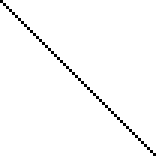

In [28]:

tools.visualise_deck(deck, display)

That's how the deck looks before any shuffling.
First let's explore perfect (faro) shuffles.

These split the deck in half and then interleave the two halves perfectly.

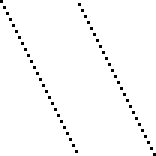

In [29]:
tools.visualise_deck(tools.faro_shuffle(deck), display)

8 perfect faro shuffles should bring us back to the original deck order

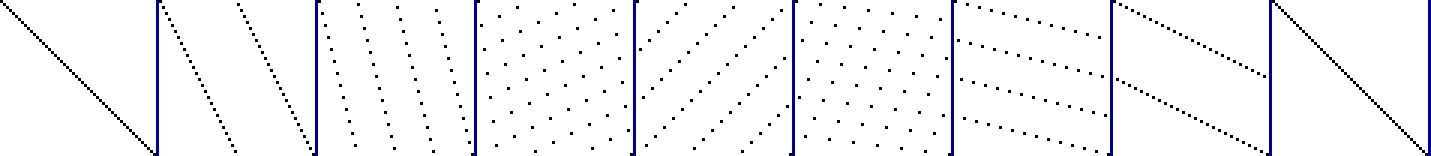

In [30]:
decks = [deck]
x = deck
for i in range(8):
    x = tools.faro_shuffle(x)
    decks.append(x)
    
tools.visualise_multiple_decks(decks, display, scale_factor=3)

Now we'll implement riffle shuffles. We'll use the Gilbert-Shannon-Reeds model.

In [31]:
# now implemented in tools.py

Now we can visualise 8 riffle shuffles.

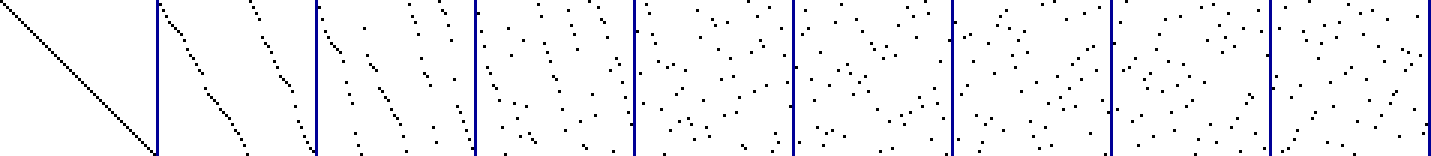

In [32]:
decks = [deck]
x = deck
for i in range(8):
    x = tools.gsr_riffle_shuffle(x)
    decks.append(x)
    
tools.visualise_multiple_decks(decks, display)

An interesting property is that short sequences of cards retain their order even after multiple shuffles.

Below shows the first 5 cards highlighted in red.
We can see visually that the order (x axis) is usually retained for 3 or 4 shuffles 

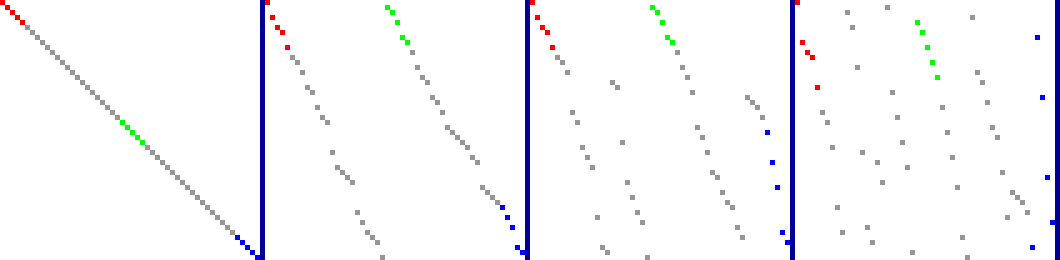

In [33]:
decks = [deck]
x = deck
for i in range(3):
    x = tools.gsr_riffle_shuffle(x)
    decks.append(x)
    
def highlight_groups(card):
    if (card <= 4):
        return (255, 0, 0)
    
    if (card >= 24 and card <= 28):
        return (0, 255, 0)
    
    if (card >= 47 and card <= 51):
        return (0, 0, 255)
    
    return (150, 150, 150)
    
tools.visualise_multiple_decks(decks, display, 5, highlight_groups)

Next we'll try to model an overhand shuffle.

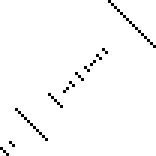

In [34]:
shuffled = tools.overhand_shuffle(deck)
tools.visualise_deck(shuffled, display)

Groups of cards stay together and retain their order. Here's how multiple overhand shuffles looks:

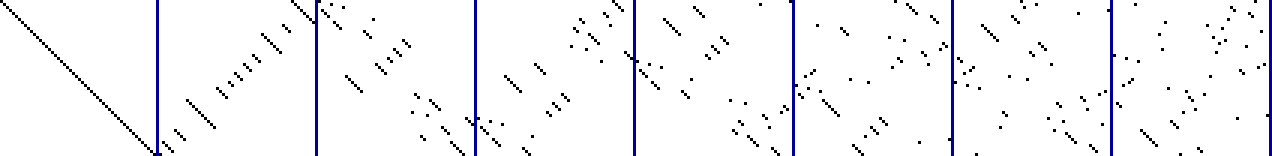

In [35]:
decks = [deck]
x = deck
for i in range(7):
    x = tools.overhand_shuffle(x)
    decks.append(x)
    
tools.visualise_multiple_decks(decks, display)

We can compare the results to the riffle shuffle results.

Riffle Shuffles


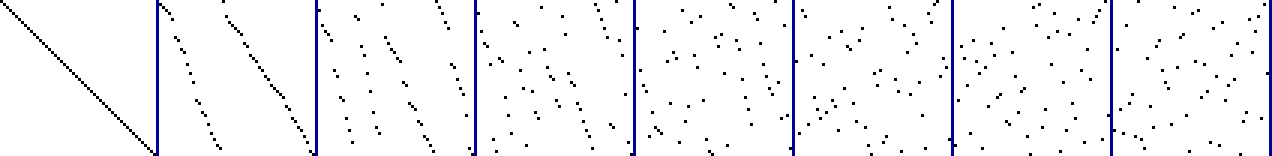

Overhand Shuffles


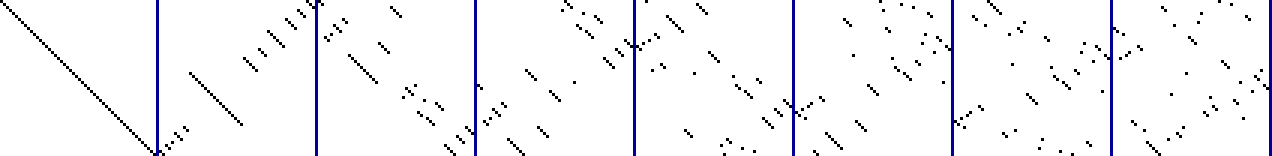

In [36]:
decks = [deck]
x = deck
for i in range(7):
    x = tools.gsr_riffle_shuffle(x)
    decks.append(x)
    
print("Riffle Shuffles")
tools.visualise_multiple_decks(decks, display)

decks = [deck]
x = deck
for i in range(7):
    x = tools.overhand_shuffle(x)
    decks.append(x)
    
print("Overhand Shuffles")
tools.visualise_multiple_decks(decks, display)

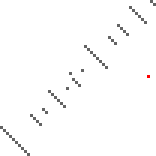

In [37]:
x = tools.overhand_shuffle(deck)
top_card = x[0]
replace_after = 26

tmp = np.zeros((52,), dtype="int")

tmp[:replace_after - 1] = x[1:replace_after]
tmp[replace_after - 1] = top_card
tmp[replace_after:] = x[replace_after:len(x)]

x = tmp

def highlight_card(card):
    if (card == top_card):
        return (255, 0, 0)
    
    return (100, 100, 100)

tools.visualise_deck(x, display, colour_for_card=highlight_card)

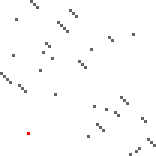

In [38]:
# TODO split these into re-usable methods

# shuffle, select, shuffle
x = tools.overhand_shuffle(tools.overhand_shuffle(deck))
top_card = x[0]
replace_after = len(deck/2)

tmp = np.zeros(len(deck), dtype="int")
tmp[:replace_after - 1] = x[1:replace_after]
tmp[replace_after - 1] = top_card
tmp[replace_after:] = x[replace_after:len(x)]

x = tmp
x = tools.overhand_shuffle(tools.overhand_shuffle(x))

def highlight_card(card):
    if (card == top_card):
        return (255, 0, 0)
    
    return (100, 100, 100)

tools.visualise_deck(x, display, colour_for_card=highlight_card)

# interesting that most of the time the card lands in the bottom-left segment
# in practise, overhand shuffles probably not reliable enough for this to happen

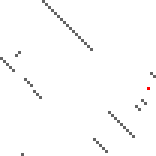

In [39]:
# TODO split these into re-usable methods

# select, shuffle, shuffle

select_card_at = random.randint(0, len(deck))
after_cut = np.zeros(len(deck))
after_cut[:len(deck)-select_card_at] = deck[select_card_at:]
after_cut[len(deck)-select_card_at:] = deck[:select_card_at]

# TODO implement random selection from middle + replaced in middle
top_card = after_cut[0]
replace_after = random.randint(0, len(deck))

tmp = np.zeros((len(deck),), dtype="int")
tmp[:replace_after - 1] = after_cut[1:replace_after]
tmp[replace_after - 1] = top_card
tmp[replace_after:] = after_cut[replace_after:len(x)]

x = tmp
x = tools.overhand_shuffle(tools.overhand_shuffle(x))

def highlight_card(card):
    if (card == top_card):
        return (255, 0, 0)
    
    return (100, 100, 100)

tools.visualise_deck(x, display, colour_for_card=highlight_card)

Cutting the deck a few times

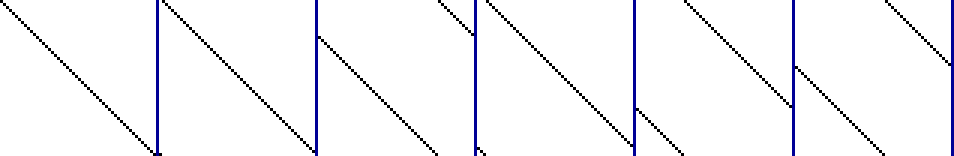

In [53]:
times = 6
decks = np.empty((times,len(deck)))
decks[0] = deck
for i in range(1,times):
    cut_at = random.randint(0, len(deck)-1)
    decks[i] = tools.cut(decks[i-1], cut_at)
tools.visualise_multiple_decks(decks, display)

Next steps:

- implement the Jordan card trick - riffle shuffle n times, move a card, analyse to see which card is out of place. Should be interesting to visualise
- draw as a circle / cycle
- 3d plot through shuffles somehow?
- visualise as a single line of pixels with colour based on value?
- highlight the sequences ? e.g. shuffling once creates two sequences (sometimes...)?
- look into the angle of the "line" flipping (top-left to bottom-right, then top-right to bottom left) in overhand shuffles
- can we draw a regression line ??
- can we train logistic regression (or neural net?) to recognise which type of shuffle has been performed based on the result
- can we train something to recognise which card is out of place
- try and model "spread through the cards, take out any one you like, put it back in somewhere else, shuffle"